<a href="https://colab.research.google.com/github/Ritik-8567/Hate-Speech-project/blob/main/Hate_Speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn. feature_extraction. text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:


import nltk
from nltk.util import pr
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
stopword=set (stopwords.words ('english'))
stemmer = nltk.SnowballStemmer ("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data=pd.read_csv('twitter_data.csv')
print(data.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


In [ ]:
data.shape

(10671, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10671 entries, 0 to 10670
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          10671 non-null  int64 
 1   count               10671 non-null  int64 
 2   hate_speech         10671 non-null  int64 
 3   offensive_language  10671 non-null  int64 
 4   neither             10671 non-null  int64 
 5   class               10671 non-null  int64 
 6   tweet               10671 non-null  object
dtypes: int64(6), object(1)
memory usage: 583.7+ KB


In [ ]:
data["labels"] = data["class"].map({0: "Hate Speech",
                                    1: "Offensive Language",
                                    2: "No Hate and Offensive"})
print(data.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet                 labels  
0  !!! RT @mayasolovely: As a woman you shouldn't...  No Hate and Offensive  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...     Offensive Language  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...     Offensive Language  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...     Offensive Language  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...     Offensive Language  


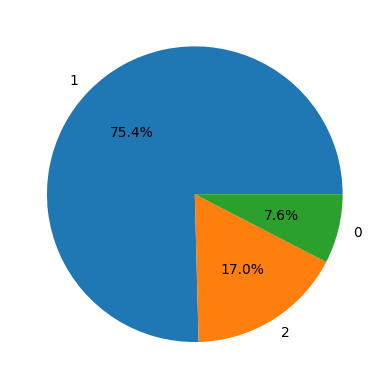

In [ ]:

plt.pie(data['class'].value_counts().values,
        labels = data['class'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

In [ ]:
data = data[["tweet", "labels"]]
print(data.head())

                                               tweet                 labels
0  !!! RT @mayasolovely: As a woman you shouldn't...  No Hate and Offensive
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...     Offensive Language
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...     Offensive Language
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...     Offensive Language
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...     Offensive Language


In [ ]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)
print(data.head())

                                               tweet                 labels
0   rt mayasolov woman shouldnt complain clean ho...  No Hate and Offensive
1   rt  boy dat coldtyga dwn bad cuffin dat hoe  ...     Offensive Language
2   rt urkindofbrand dawg rt  ever fuck bitch sta...     Offensive Language
3             rt cganderson vivabas look like tranni     Offensive Language
4   rt shenikarobert shit hear might true might f...     Offensive Language


In [ ]:
x = np.array(data["tweet"])
y = np.array(data["labels"])

cv = CountVectorizer()
X = cv.fit_transform(x) # Fit the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)


0.8461101646791596

In [ ]:
y_pred=clf.predict(X_test)
y_pred

array(['No Hate and Offensive', 'Offensive Language',
       'Offensive Language', ..., 'Offensive Language',
       'Offensive Language', 'Offensive Language'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8461101646791596


In [ ]:
sample = "Im a boss ass bitch"" ...that needs to sit in a corner"
data = cv.transform([sample]).toarray()
print(clf.predict(data))

['Offensive Language']


In [ ]:
sample = "It is really awesome"
data = cv. transform([sample]). toarray()
print(clf. predict(data))

['No Hate and Offensive']


In [ ]:

sample = "You are too bad and I dont like your attitude"
data = cv. transform([sample]). toarray()
print(clf. predict(data))

['Offensive Language']


In [ ]:
#!pip install streamlit

In [ ]:
def hate_speech_detection():
    import streamlit as st
    st.title("Hate Speech Detection")
    user= st.text_area("Enter any Tweet:")
    if len(user)<1:
      st.write(" ")
    else:
         sample=user
         data=cv.transform([sample]).toarray()
         a=clf.predict(data)
         st.title(a)
hate_speech_detection()

ModuleNotFoundError: ignored